Haz clic en el botón para abrir este notebook en Google Colab:

<a href="https://colab.research.google.com/github/EuniceGarcia503/Challenge1_AluraStore/blob/main/AluraStoreLatam.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" style="height: 40px;">
</a>


In [108]:
!git config --global user.name "Eunice García"
!git config --global user.email "legd.cl26@gmail.com"

#**💾 Importación de Datos.**



In [109]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


--------------------------------------------------------------------------------

#**🧾 Descripción de los Datos.**

-------------------------------------------------------------------------

El conjunto de datos incluye la siguientes columnas y su respectiva información:

- **Producto,Categoría del Producto:** Artículos vendidos y clasificación del artículo. Ambos datos tipo object.

- **Precio y Costo de Envío:** Valores de venta y costos asociados a su distribución. Ambos datos tipo float64.

- **Fecha de Compra y Lugar de Compra:** Información temporal y geográfica de la compra. Datos para fecha datetime64[ns] y Lugar tipo object respectivamente.

- **Calificación:** Evaluación de compra sugiere una nota general del clientes. Sin comentarios adicionales. Dato tipo int64.

- **Método de Pago:** Métodos utilizados por los clientes, tipo de pago y cuotas. Dato tipo object.

- **lat y lon:** Coordenadas Geográficas en longitud y latitud que sugieren ubicación de las transacciones.Ambos datos tipo float64

-----------------------------------------------------------------------------------

#**⚙️ Listas Útiles para el Análisis.**

In [110]:
#base_tienda contiene los variables con los datos por tienda.
base_tienda = [tienda1,tienda2,tienda3,tienda4]
#nombre_tienda contiene los nombres de las tiendas.
nombre_tienda = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
#emojis_ranking_categorias contiene los emojis para rankings de categorías (hasta 8 categorías)
emojis_ranking_categorias = ['1️⃣', '2️⃣', '3️⃣', '4️⃣', '5️⃣', '6️⃣', '7️⃣', '8️⃣']
#Lista Emojis emojis_ranking_productos para top productos más vendidos.
emojis_ranking_productos = ['1️⃣', '2️⃣', '3️⃣']
#Lista Emojis emojis_ranking_productos_descendente para top productos menos vendidos.
emojis_ranking_productos_descendente = ['3️⃣', '2️⃣', '1️⃣']
#Listas emoji_notas para medir satisfacción de cliente.
emoji_notas = ["🔵 Excelente.","🟢 Buena.","🟡 Aceptable.","🔴 Revisión."]
#Lista periodos_años contiene los años de los registros en cada base. (como enteros para facilitar comparaciones)
periodos_años = [2020, 2021, 2022, 2023]
#Lista periodos_trimestres contiene etiqueta del trimestres del año.
periodos_trimestres = ['T1', 'T2', 'T3', 'T4']

In [111]:
#Tratamiento de columna fechas para análisis temporales.
#Dar formato datetime a columna Fecha de Compra.
#Definimos función datetime_format convierte dato datetime.
def datetime_format(df):
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'],format='%d/%m/%Y',dayfirst=True,errors='coerce',)
  return df
#Declarar función datetime_format en todas las bases.
for i in base_tienda:
  datetime_format(i)

#Agregar columna Año,Mes y Trimestre.
#Definimos función: año_mes_trimestre para agregar columna Año,Mes y Trimestre en cada base de tienda.
def año_mes_trimestre (df):
  df['Año'] = df['Fecha de Compra'].dt.year#Agregar columna de año.
  # Agregar columna de mes, handling potential NaN values
  df['Mes'] = df['Fecha de Compra'].dt.month
  df['Mes'] = pd.to_numeric(df['Mes'], errors='coerce').astype('Int64')#Reforzamos que es un valor númerico de tipo entero para aplicar función más adelante.
  df['Trimestre'] = df['Fecha de Compra'].dt.quarter#Agregar columna de trimestre.
  df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
  return df

#Declarar función año_mes_trimestre en todas las bases.
for df in base_tienda:
  año_mes_trimestre(df)


#🧲 **Importando Otras Bibliotecas para el Análisis.**

In [112]:
from itertools import zip_longest
import numpy as np
import matplotlib.pyplot as plt  # Librería para gráficos básicos
import matplotlib.cm as cm # módulo de colormaps (mapas de colores) de matplotlib.
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.lines import Line2D

##**📌  Cálculos Solicitados.**

-----------------------------------------------------------------------


###**🖱️ Ventas Totales por Tienda.**


-----------------------------------------------------------------

**🎯 Objetivo del cálculo:**

Determinar cuál tienda ha generado la mayor cantidad de ingresos totales. Este cálculo entrega un primer acercamiento al rendimiento general de cada tienda, reflejando cuánto dinero ha captado a través de sus ventas.

**🧠 Interpretación esperada:**

* Las ventas totales indican la capacidad de una tienda para generar ingresos brutos.

* Una tienda con un volumen alto de ventas, sugiere mayores ingresos,  precios adecuados o alta demanda.

* Una tienda con ingresos bajos podría estar enfrentando problemas en su operación, que abria de investigar.

* Aunque no es una métrica definitiva por sí sola, un ingreso total bajo puede ser una señal de alerta sobre su viabilidad.

In [113]:
#Código cálculo de ventas totales por tienda.
#vt_portienda contiene las ventas totales por tienda.
vt_portienda = {}

#Función ventas_totales suma y totabiliza las ventas de cada tienda.
def ventas_totales(base,tienda):
  global vt_portienda
  vt = base['Precio'].sum()
  vt_portienda[tienda] = vt
  return vt_portienda

#Declaramos función ventas_totales para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  ventas_totales(base,tienda)

#Importamos las llaves y valores del diccionario vt_portienda para crear DataFrame.
key_vt_portienda = list(vt_portienda.keys())
val_vt_portienda = list(vt_portienda.values())

#Creamos DataFrame df_vt_portienda con valor de columna Tienda y Ventas Totales.
df_vt_portienda = pd.DataFrame({'Tienda':key_vt_portienda,'Ventas_Totales':val_vt_portienda}).sort_values(by='Ventas_Totales',ascending=False)

#Visualización Resumen Ventas Totales por Tienda (datos del diccionario vt_portienda)
print(f'💰 Ventas Totales por Tienda:\n')
for tienda,ventas in vt_portienda.items():
  print(f'🏪 {tienda}:  $ {ventas:>10,.2f} CLP')

#Cálculos complementarios para análisis preliminar de las ventas por tienda.
venta_global = df_vt_portienda['Ventas_Totales'].sum()
diferencia_tienda1_tienda4 = df_vt_portienda['Ventas_Totales'][0] - df_vt_portienda['Ventas_Totales'][3]
porcentaje_diferencia_t1_t4 = (diferencia_tienda1_tienda4 / venta_global) * 100

print(f"\nComentarios preliminares.\n")
print(f"* Las Ventas Globales ascienden a $ {venta_global:,.2f} COP.")
print(f"* La Diferencia en ventas entre T1 y T4 es $ {diferencia_tienda1_tienda4:,.2f} COP y representa el {porcentaje_diferencia_t1_t4:,.2f} % de las ventas globales.")
print(f"* La Diferencia entre la tienda con mayor y menor facturación es mínima.")
print(f"* Se recomienda observar las ventas anuales para identificar tendencia en el tiempo(aumento,disminución,etc).")
print(f"  Dada la diferencia entre T1 y T2 es posible evaluar estatégias de éxito y aplicar en el resto de tiendas para aumentar sus ventas una vez se verifique la tendencia\n  de las ventas de cada tienda.")
print(f"* Se recomienda calcular un margen de contribución parcial deduciendo los costos de envío para evaluar de manera preliminar si tiene capacidad para generar ingresos.")
print()

💰 Ventas Totales por Tienda:

🏪 Tienda 1:  $ 1,150,880,400.00 CLP
🏪 Tienda 2:  $ 1,116,343,500.00 CLP
🏪 Tienda 3:  $ 1,098,019,600.00 CLP
🏪 Tienda 4:  $ 1,038,375,700.00 CLP

Comentarios preliminares.

* Las Ventas Globales ascienden a $ 4,403,619,200.00 COP.
* La Diferencia en ventas entre T1 y T4 es $ 112,504,700.00 COP y representa el 2.55 % de las ventas globales.
* La Diferencia entre la tienda con mayor y menor facturación es mínima.
* Se recomienda observar las ventas anuales para identificar tendencia en el tiempo(aumento,disminución,etc).
  Dada la diferencia entre T1 y T2 es posible evaluar estatégias de éxito y aplicar en el resto de tiendas para aumentar sus ventas una vez se verifique la tendencia
  de las ventas de cada tienda.
* Se recomienda calcular un margen de contribución parcial deduciendo los costos de envío para evaluar de manera preliminar si tiene capacidad para generar ingresos.



💰🗓️🏪 Ventas Anuales por Tienda.



,Tienda 1,Tienda 2,Tienda 3,Tienda 4
2020,368933200.0,320466600.0,321707500.0,330847700.0
2021,362120800.0,351215500.0,362954400.0,347823600.0
2022,316565600.0,358226500.0,350438300.0,302221500.0
2023,103260800.0,86434900.0,62919400.0,57482900.0


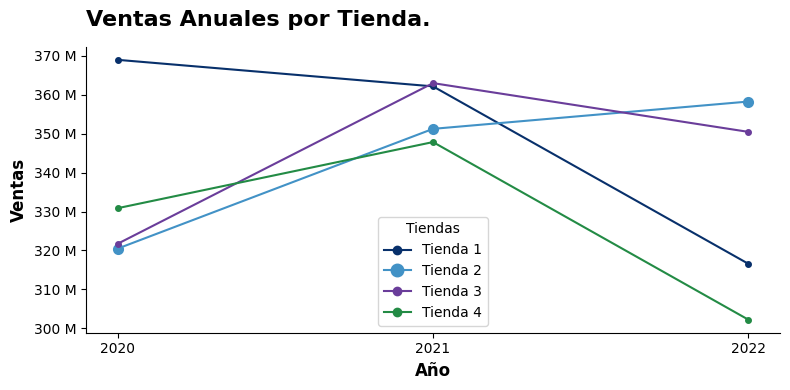

In [141]:
#Código para calcular las ventas anuales por tienda.

#Definiendo diccionario tienda_venta_year para organizamos las ventas anuales por tienda
tienda_venta_year = {}
#Función ventas_anuales para calculas las ventas anuales por tienda.
def ventas_anuales(tienda, df):
  ventas = df[['Precio', 'Año']]
  for año in periodos_años:
      total = (
          ventas[ventas['Año'] == año]
          .groupby('Año')['Precio']
          .sum()
        )
      if not total.empty:
          tienda_venta_year[(tienda, año)] = total.iloc[0]
      else:
          tienda_venta_year[(tienda, año)] = 0


#Declaramos función ventas_anuales para todas las tiendas.
for tienda, df in zip(nombre_tienda,base_tienda):
    ventas_anuales(tienda, df)

#Unimos información de diccionario tienda_venta_year en df_ventas_resumen.
df_ventas_resumen = pd.Series(tienda_venta_year).unstack(level=0)

#Visualización de resultados para ventas anuales por tienda.
print("💰🗓️🏪 Ventas Anuales por Tienda.\n")
display(df_ventas_resumen)

print(f"\n\n")
#Gráfico de líneas para ventas anuales por tienda.

def graficar_ventas_anuales_tiendas(store_ventas_year):
    datos = {}

    # Llenamos: datos[tienda][año] = ventas
    for (tienda, año), valor in store_ventas_year.items():
        if tienda not in datos:
            datos[tienda] = {}
        datos[tienda][año] = valor

    # Aseguramos orden en los años y excluimos 2023
    todos_los_años = sorted({año for _, año in store_ventas_year if año != 2023})
    tiendas = list(datos.keys())

    # Colores fijos por tienda
    colores_tiendas = {
        'Tienda 1': '#08306b',   # Azul oscuro
        'Tienda 2': '#4292c6',   # Azul claro
        'Tienda 3': '#6a3d9a',   # Morado
        'Tienda 4': '#238b45'    # Verde
    }

    fig, ax = plt.subplots(figsize=(8, 4))

    # Graficamos una línea por tienda
    for tienda in tiendas:
        ventas_por_año = [datos[tienda].get(año, 0) for año in todos_los_años]
        color = colores_tiendas.get(tienda, '#999999')  # color de la línea

        if tienda == 'Tienda 1':
            marcador = '.'
            facecolor = color
            borde = color
        elif tienda == 'Tienda 4':
            marcador = '.'
            facecolor = '#238b45'  # verde distintivo para el marcador
            borde = '#238b45'
        elif tienda == 'Tienda 3':
            marcador = '.'
            facecolor = color
            borde = color
        else:  # Tienda 2
            marcador = 'o'
            facecolor = color
            borde = color

        ax.plot(
            todos_los_años,
            ventas_por_año,
            marker=marcador,
            color=color,
            markerfacecolor=facecolor,
            markeredgecolor=borde,
            markeredgewidth=2
        )

    # Para visualizar etiqueta en millones.
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f} M'))

    ax.set_xlabel('Año', fontsize=12, fontweight='bold')
    ax.set_ylabel('Ventas', fontsize=12, fontweight='bold')
    ax.set_title('Ventas Anuales por Tienda.', loc='left', fontsize=16, fontweight='bold', pad=15)
    ax.set_xticks(todos_los_años)

    # 🔷 Crear leyenda con marcadores correctos
    legend_elements = [
        Line2D([0], [0], color=colores_tiendas['Tienda 1'], marker='.', markersize=10,
               markerfacecolor=colores_tiendas['Tienda 1'], markeredgecolor=colores_tiendas['Tienda 1'], markeredgewidth=2, label='Tienda 1'),
        Line2D([0], [0], color=colores_tiendas['Tienda 2'], marker='o', markersize=8,
               markerfacecolor=colores_tiendas['Tienda 2'], markeredgecolor=colores_tiendas['Tienda 2'], markeredgewidth=2, label='Tienda 2'),
        Line2D([0], [0], color=colores_tiendas['Tienda 3'], marker='.', markersize=10,
               markerfacecolor=colores_tiendas['Tienda 3'], markeredgecolor=colores_tiendas['Tienda 3'], markeredgewidth=2, label='Tienda 3'),
        Line2D([0], [0], color=colores_tiendas['Tienda 4'], marker='.', markersize=10,
               markerfacecolor='#238b45', markeredgecolor='#238b45', markeredgewidth=2, label='Tienda 4'),
    ]

    ax.legend(handles=legend_elements, title='Tiendas')

    # 🔷 Remover bordes superior y derecho
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

#Graficar:
graficar_ventas_anuales_tiendas(tienda_venta_year)


In [142]:
#Comentarios preliminares sobre las ventas anuales por tienda.
"""
Tienda 1: Parte como líder con el mayor volumen de ventas; sin embargo, desde 2021 muestra una tendencia marcadamente descendente, que se acentúa abruptamente en 2022. Esto podría indicar pérdida de mercado, problemas operativos o cambios en la demanda que requieren atención.
          A pesar de esta caída sostenida, El liderazgo en volumen acumulado de ventas parece ser por las ventas q obtuvo en 2020.
Tienda 2: Parte en 2020 como la tienda con menor nivel de ventas. Sin embargo, desde 2021 presenta una tendencia sostenida al alza, ubicándola como la tienda de mejor desempeño en 2022. Esto la convierte en un referente positivo para identificar buenas prácticas o condiciones
          comerciales favorables.
Tienda 3: Inicia en 2020 como la segunda tienda con menores ventas, pero registra un crecimiento notable, incluso superior al de Tienda 2 en 2021, llegando a casi igualar a Tienda 1 en volumen. A partir de 2022, su tendencia se revierte ligeramente, mostrando una caída moderada,
          que aun así le permite cerrar el año como la segunda tienda con mayor volumen acumulado de ventas.
Tienda 4: Comienza en 2020 como la segunda tienda con mayor volumen de ventas. Si bien inicia con una tendencia al alza (similar a Tienda 2 y Tienda 3), su crecimiento fue menos pronunciado, lo que la llevó a caer al último lugar en ventas en 2021, superada por T2 y T3. En 2022,
          sus ventas cayeron abruptamente, consolidando su posición como la tienda con el menor volumen de ventas, incluso por debajo de Tienda 1.
"""
print()

----------------------------------------------------------------------------------

###**🖱️Ventas por Categoría y Tienda.**

-------------------------------------------------------------------------

**🎯 Objetivo del cálculo:**

Identificar cuáles son las categorías de productos que generan mayores ventas en cada tienda. Este análisis permite comprender el enfoque comercial de cada local y detectar qué líneas de productos tienen mayor aceptación o demanda por parte de los clientes y por ende mayores ingresos.

**🧠 Interpretación esperada:**

* Una categoría con mayores ventas sugiere que la tienda está bien posicionada en ese tipo de producto o que existe alta demanda en su mercado local.

* Ayuda a evaluar la estrategia de inversión y oferta de productos de la tienda: en qué está apostando más para obtener mayor margen de ganancia.

* También permite comparar si todas las tiendas siguen un patrón similar o si alguna depende demasiado de una sola categoría (lo que puede ser un riesgo).

* Si una categoría genera bajo margen de ganancia en una tienda pero es fuerte en otra, podría indicar una oportunidad de mejora o expansión en el surtido.

In [116]:
#Código cálculo de ventas totales por categoría y tienda.
#Contiene las ventas totales por categoría y tienda.
vt_categoria_tienda = {}
#Definimos función venta_categoria_tienda para calcular las ventas totales por categoría en cada tienda.
def venta_categoria_tienda(base,tienda):
  global vt_categoria_tienda
  vt_cat_t = pd.Series(base.groupby('Categoría del Producto')['Precio'].sum(),name= tienda).sort_values(ascending=False)
  vt_categoria_tienda[tienda] = vt_cat_t
  return vt_categoria_tienda

#Declaramos fución venta_categoria_tienda para  cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  venta_categoria_tienda(base,tienda)

#df_vta_categoria_tienda_consolidado almacena de las ventas totales por categoría y tienda.
df_vta_categoria_tienda_consolidado = pd.DataFrame(vt_categoria_tienda)

#Función resumen_vta_cat_tienda crea visualización de resultados para las ventas por categoría y tienda.
def resumen_vta_cat_tienda(tienda,df_emoji):
  datos_tienda1 = vt_categoria_tienda.get(tienda).items()
  for (cat,valor),emoji in zip(datos_tienda1,df_emoji):
    print(f'{cat:>25}:  $ {valor:>12,.0f} {emoji}')

#Visualización del resumen de ventas totales por categoría y tienda.
print(f'💰 Ventas Totales por Categoría y Tienda.\n')
for tienda in nombre_tienda:
  print(f'🏪 {tienda}:')
  resumen_vta_cat_tienda(tienda,emojis_ranking_categorias)
  print('\n')

💰 Ventas Totales por Categoría y Tienda.

🏪 Tienda 1:
             Electrónicos:  $  429,493,500 1️⃣
        Electrodomésticos:  $  363,685,200 2️⃣
                  Muebles:  $  187,633,700 3️⃣
   Instrumentos musicales:  $   91,299,000 4️⃣
     Deportes y diversión:  $   39,290,000 5️⃣
                 Juguetes:  $   17,995,700 6️⃣
  Artículos para el hogar:  $   12,698,400 7️⃣
                   Libros:  $    8,784,900 8️⃣


🏪 Tienda 2:
             Electrónicos:  $  410,831,100 1️⃣
        Electrodomésticos:  $  348,567,800 2️⃣
                  Muebles:  $  176,426,300 3️⃣
   Instrumentos musicales:  $  104,990,300 4️⃣
     Deportes y diversión:  $   34,744,500 5️⃣
                 Juguetes:  $   15,945,400 6️⃣
  Artículos para el hogar:  $   14,746,900 7️⃣
                   Libros:  $   10,091,200 8️⃣


🏪 Tienda 3:
             Electrónicos:  $  410,775,800 1️⃣
        Electrodomésticos:  $  329,237,900 2️⃣
                  Muebles:  $  201,072,100 3️⃣
   Instrumentos musicales

In [117]:
#Análisis preliminar de las Ventas por Categoría y Tienda.
#Generamos resumen de número de categorías por tienda.
print(f"Análisis preliminar de las Ventas por Categoría y Tienda.\n")
print(f"Número de Categorías por Tienda.\n")

for tienda,base in zip(nombre_tienda,base_tienda):
  cat_n = base['Categoría del Producto'].nunique()
  print(f'🏪 {tienda}: {cat_n} categorías.')


#Comparando categorías entre tiendas.
#Crear conjunto todas_categorias.
todas_categorias = set()
for tienda in base_tienda:
    todas_categorias.update(tienda['Categoría del Producto'].unique())

todas_categorias = sorted(todas_categorias)  # para ordenarlas

#tabla_resumen_categorias contiene un DataFrame vacío para rellenar con check o X
tabla_resumen_categorias = pd.DataFrame(index=todas_categorias)

#Llenar la tabla tabla_resumen_categorias con ✔️ o ✖️
for tienda, nombre in zip(base_tienda, nombre_tienda):
    categorias_tienda = tienda['Categoría del Producto'].unique()
    tabla_resumen_categorias[nombre] = tabla_resumen_categorias.index.map(
        lambda x: '✔️' if x in categorias_tienda else '✖️'
    )

#Definir indice y nombre de la tabla resumen.
tabla_resumen_categorias.index.name = 'Categoría'
tabla_resumen_categorias.reset_index(inplace=False)

#Visualizar resultado para categorías comunes entre tiendas.
print('\n\n📦 Categorías Comunes entre Tiendas.\n')
print(tabla_resumen_categorias)

##Matriz de comparación del mix por categoría.
#df_vta_categoria_tienda_consolidado
df_base_consolidado_vta_categoria_tienda = pd.concat(vt_categoria_tienda,names=['Tienda']).reset_index()
df_base_consolidado_vta_categoria_tienda.columns = ['Tienda','Categoría_producto','Ventas']
df_base_consolidado_vta_categoria_tienda['Ventas_Totales'] = df_base_consolidado_vta_categoria_tienda.groupby('Tienda')['Ventas'].transform('sum')
df_base_consolidado_vta_categoria_tienda['Participación'] = df_base_consolidado_vta_categoria_tienda['Ventas'] / df_base_consolidado_vta_categoria_tienda['Ventas_Totales']
#df_base_consolidado_vta_categoria_tienda['Ventas_Totales'] = df_base_consolidado_vta_categoria_tienda['Ventas_Totales'].map('{:,.0f}'.format)
#df_base_consolidado_vta_categoria_tienda['Participación'] = df_base_consolidado_vta_categoria_tienda['Participación'].map('{:.2%}'.format)
#Visualización resumen de participación de las ventas por categoría en las ventas totales.
df_resument_participacion_vta_categoria = df_base_consolidado_vta_categoria_tienda.pivot(index='Categoría_producto',columns='Tienda',values='Participación')
# Ordenar por el valor máximo en cualquier tienda
df_resument_participacion_vta_categoria = df_resument_participacion_vta_categoria.loc[
    df_resument_participacion_vta_categoria.max(axis=1).sort_values(ascending=False).index
]

# Copia del resumen original para no modificarlo.
df_con_acumulado = df_resument_participacion_vta_categoria.copy()

#Cálculo acumulado orden descendente para cada tienda.
for tienda in df_con_acumulado.columns:
    # Ordenar los índices participación.
    orden = df_con_acumulado[tienda].sort_values(ascending=False).index
    # Crear acumulado ordenado.
    acumulado = df_con_acumulado.loc[orden, tienda].cumsum()
    # Crear una nueva columna para el acumulado y volver al mismo orden de índice original.
    df_con_acumulado[f'Acumulado_{tienda}'] = acumulado.reindex(df_con_acumulado.index)

#Visualización para el resumen de participación de las ventas por categoría en las ventas totales..
print(f"\n\n📈💰🛒📦 Contribución por Categoría en las Ventas Totales por Tienda y su Acumulado.\n")
display(df_con_acumulado)


def contar_categorias_80(columna):
    # Ordenar de mayor a menor participación
    ordenadas = columna.sort_values(ascending=False)
    # Sumar acumulativamente
    acumulado = ordenadas.cumsum()
    # Contar cuántas categorías suman hasta el 80%
    return (acumulado <= 0.8).sum()

#Declarar función categorias_80_por_tienda por tienda.
categorias_80_por_tienda = df_resument_participacion_vta_categoria.apply(contar_categorias_80, axis=0)

#Visualización para número de categorías que concentran el 80% del mix.
print(f"\n\n🔝🛒📦 Número de Categorías que Concentran el 80% del Mix.\n")
categorias_80_por_tienda = categorias_80_por_tienda.to_frame(name='Categorías hasta 80%')
display(categorias_80_por_tienda)


Análisis preliminar de las Ventas por Categoría y Tienda.

Número de Categorías por Tienda.

🏪 Tienda 1: 8 categorías.
🏪 Tienda 2: 8 categorías.
🏪 Tienda 3: 8 categorías.
🏪 Tienda 4: 8 categorías.


📦 Categorías Comunes entre Tiendas.

                        Tienda 1 Tienda 2 Tienda 3 Tienda 4
Categoría                                                  
Artículos para el hogar       ✔️       ✔️       ✔️       ✔️
Deportes y diversión          ✔️       ✔️       ✔️       ✔️
Electrodomésticos             ✔️       ✔️       ✔️       ✔️
Electrónicos                  ✔️       ✔️       ✔️       ✔️
Instrumentos musicales        ✔️       ✔️       ✔️       ✔️
Juguetes                      ✔️       ✔️       ✔️       ✔️
Libros                        ✔️       ✔️       ✔️       ✔️
Muebles                       ✔️       ✔️       ✔️       ✔️


📈💰🛒📦 Contribución por Categoría en las Ventas Totales por Tienda y su Acumulado.



Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Acumulado_Tienda 1,Acumulado_Tienda 2,Acumulado_Tienda 3,Acumulado_Tienda 4
Categoría_producto,,,,,,,,
Electrónicos,0.373187,0.368015,0.374106,0.394343,0.373187,0.368015,0.374106,0.394343
Electrodomésticos,0.316006,0.312241,0.299847,0.272792,0.689193,0.680256,0.673953,0.667135
Muebles,0.163035,0.158039,0.183123,0.185414,0.852228,0.838295,0.857076,0.852548
Instrumentos musicales,0.079330,0.094048,0.070473,0.072327,0.931558,0.932343,0.927549,0.924875
Deportes y diversión,0.034139,0.031123,0.032416,0.032118,0.965697,0.963467,0.959964,0.956992
Juguetes,0.015636,0.014284,0.017669,0.019513,0.981333,0.977750,0.977634,0.976506
Artículos para el hogar,0.011034,0.013210,0.013716,0.014517,0.992367,0.990960,0.991349,0.991023
Libros,0.007633,0.009040,0.008651,0.008977,1.000000,1.000000,1.000000,1.000000




🔝🛒📦 Número de Categorías que Concentran el 80% del Mix.



,Categorías hasta 80%
Tienda,
Tienda 1,2
Tienda 2,2
Tienda 3,2
Tienda 4,2


In [118]:
"""
Al comparar las categorías de productos entre tiendas, observamos que son idénticas tanto en cantidad como en tipo.
Es decir, cada tienda trabaja con las mismas categorías y con igual número de productos dentro de cada una.
Al ordenar las ventas por categoría de forma descendente, notamos que el orden de prioridad de las categorías se mantiene igual entre tiendas, aunque los valores absolutos de ventas difieren.
Esto indica un patrón comercial común, pero con distintos niveles de intensidad por tienda.
Retomando la información de ventas por categoría y tienda, se procedió a calcular la participación de cada categoría en el total de ventas de cada tienda, con el objetivo de analizar el grado
de diversificación o concentración del mix a nivel de categoría.
Al observar las columnas de participación acumulada por categoría y tienda, se comprobó que en las cuatro tiendas, el 80% de las ventas se concentran únicamente en dos categorías: Electrónicos
y Electrodomésticos, en ese orden.
Este hallazgo sugiere que las cuatro tiendas comparten un mismo nivel de riesgo desde el punto de vista del manejo estratégico del mix, dado que una porción significativa de las ventas depende
de un subconjunto limitado del portafolio de categorías.
"""
print()

---------------------------------------------------------------------------------

###**🖱️ Productos Más y Menos Vendidos por Tienda.**


-----------------------------------------------------------------------

🎯 **Objetivo del cálculo:**

Determinar qué productos tienen mayor y menor volumen de ventas en cada tienda. Este análisis permite identificar los productos con alta o baja rotación, es decir, qué tan frecuentemente se venden.

**🧠 Interpretación esperada:**

* Un producto muy vendido (alta rotación) puede ser indicativo de popularidad, accesibilidad en precio o fuerte necesidad del cliente.

* Un producto con pocas ventas puede deberse a:

 Falta de promoción, Alto precio,Baja demanda local.

* Sin embargo, una alta rotación no garantiza rentabilidad: si el margen de ganancia es bajo, el producto podría no contribuir significativamente a las utilidades.

* Este análisis es útil para revisar la eficiencia del mix de producto y para evaluar si ciertos productos justifican su espacio en inventario o deberían ser reemplazados.

In [119]:
#Código para calcular los productos más y menos vendidos por tienda.
#Diccionarios contienen la información de las ventas totales pro producto y categoría, los más y menos vendidos.
vta_producto_tienda = {}
top3_mas_vendidos = {}
top3_menos_vendidos = {}

"""
Función venta_producto_tienda calcula las ventas totales por producto y las guarda en el diccionario vta_producto_tienda.
selecciona los 3 productos más vendidos y los guarda en el diccionario top3_mas_vendidos.
selecciona los 3 productos menos vendidos y los guarda en el diccionario top3_menos_vendidos.
"""
def venta_producto_tienda(base,tienda):
  global vta_producto_tienda
  global top3_mas_vendidos
  global top3_menos_vendidos

  vt_producto = pd.DataFrame(base.groupby('Producto')['Precio'].sum())
  vta_producto_tienda[tienda] = vt_producto

  p_mas_v = vt_producto.nlargest(3,'Precio')
  p_mas_v.rename(columns={'Precio':'Ventas'},inplace=True)
  top3_mas_vendidos[tienda] = p_mas_v

  p_menos_v = vt_producto.nsmallest(3,'Precio')
  p_menos_v.rename(columns={'Precio':'Ventas'},inplace=True)
  top3_menos_vendidos[tienda] = p_menos_v

  return

#Declaramos función venta_producto_tienda para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  venta_producto_tienda(base,tienda)

#Función resumen_vta_producto_mas_menos crea visualización de resultados para las ventas por producto y tienda.
def resumen_vta_producto_mas_menos(tienda,df_mas_v,df_menos_v,emoji_mas,emoji_menos):
  v_mas = df_mas_v[tienda].values
  p_mas = df_mas_v[tienda].index

  v_menos = df_menos_v[tienda].values
  p_menos = df_menos_v[tienda].index

  print(f"🏪 {tienda}\n")
  print(f"🛍️🏅 Productos Más Vendidos:")
  for p,valor,emoji in zip(p_mas,v_mas,emoji_mas):
    vt = valor[0]
    print(f"{p:>18} $ {vt:>15,.1f} COP {emoji}")
  print()
  print(f"Productos Menos Vendidos:")
  for p,valor,emoji in zip(p_menos,v_menos,emoji_menos):
    vt = valor[0]
    print(f"{p:>18} $ {vt:>15,.1f} COP {emoji}")

#Declaramos función resumen_vta_producto_mas_menos visualizar resumen de las 4 tiendas.
print(f'💰 Ventas Totales por Producto y Tienda.\n')
for tienda in nombre_tienda:
  resumen_vta_producto_mas_menos(tienda,top3_mas_vendidos,top3_menos_vendidos,emojis_ranking_productos,emojis_ranking_productos_descendente)
  print('\n')

💰 Ventas Totales por Producto y Tienda.

🏪 Tienda 1

🛍️🏅 Productos Más Vendidos:
     TV LED UHD 4K $   142,150,200.0 COP 1️⃣
      Refrigerador $   112,143,300.0 COP 2️⃣
         Iphone 15 $    97,902,200.0 COP 3️⃣

Productos Menos Vendidos:
Cuerda para saltar $       652,800.0 COP 3️⃣
    Dinosaurio Rex $       688,900.0 COP 2️⃣
   Cubo mágico 8x8 $       696,900.0 COP 1️⃣


🏪 Tienda 2

🛍️🏅 Productos Más Vendidos:
         Iphone 15 $   113,225,800.0 COP 1️⃣
     TV LED UHD 4K $   103,375,000.0 COP 2️⃣
      Refrigerador $    97,632,500.0 COP 3️⃣

Productos Menos Vendidos:
   Cubo mágico 8x8 $       643,600.0 COP 3️⃣
    Dinosaurio Rex $       770,300.0 COP 2️⃣
Cuerda para saltar $       856,900.0 COP 1️⃣


🏪 Tienda 3

🛍️🏅 Productos Más Vendidos:
      Refrigerador $    99,889,700.0 COP 1️⃣
     TV LED UHD 4K $    96,669,100.0 COP 2️⃣
         Iphone 15 $    93,225,700.0 COP 3️⃣

Productos Menos Vendidos:
   Cubo mágico 8x8 $       640,400.0 COP 3️⃣
    Dinosaurio Rex $       795,600

In [120]:
#Análisis preliminar productos más y menos vendidos por tienda.
#Generamos resumen de número total de productos por categoría y tienda.
print(f"Análisis Preliminar Complementario del Mix de Producto por Categoría y Tienda.\n")
print(f"📦 Número Total de Productos por Categoría y Tienda.\n")

#produtos_unicos_categoria_tienda Contiene el número de productos únicos por categoría en cada tienda.
produtos_unicos_categoria_tienda = {}

#Función calcula el número de productos únicos por categoría en cada tienda.
def n_producto_categoria(base,tienda):
  np_cat = base.groupby('Categoría del Producto')['Producto'].nunique()
  produtos_unicos_categoria_tienda[tienda] = np_cat
  return

#Declaramos función n_producto_categoria para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  n_producto_categoria(base,tienda)

#Dataframe df_np_categortia contiene la información del diccionario produtos_unicos_categoria_tienda
df_np_categortia = pd.DataFrame(produtos_unicos_categoria_tienda)
display(df_np_categortia)
print()

#Obtener todos los productos q se venden en las tiendas.
#Crear conjunto todas_producto.
todos_producto_cat = set()
for tienda in base_tienda:
    todos_producto_cat.update(tienda['Producto'].unique())

t_p_cat = sorted(todos_producto_cat)  # para ordenarlas

# crear un DataFrame vacío
resumen_p_cat = pd.DataFrame(index=t_p_cat)

# llenar la tabla con ✔️ o ✖️
for tienda, nombre in zip(base_tienda, nombre_tienda):
    producto_tienda = tienda['Producto'].unique()
    resumen_p_cat[nombre] = resumen_p_cat.index.map(
        lambda x: '✔️' if x in producto_tienda else '✖️'
    )

resumen_p_cat.index.name = 'Producto'
resumen_p_cat.reset_index(inplace=False)

print('\n\n📦 Productos Únicos y Comunes entre Tiendas.\n')
display(resumen_p_cat)

##Matriz de comparación del mix por categoría.
#df_vta_categoria_tienda_consolidado
df_base_consolidado_vta_categoria_tienda = pd.concat(vt_categoria_tienda,names=['Tienda']).reset_index()
df_base_consolidado_vta_categoria_tienda.columns = ['Tienda','Categoría_producto','Ventas']
df_base_consolidado_vta_categoria_tienda['Ventas_Totales'] = df_base_consolidado_vta_categoria_tienda.groupby('Tienda')['Ventas'].transform('sum')
df_base_consolidado_vta_categoria_tienda['Participación'] = df_base_consolidado_vta_categoria_tienda['Ventas'] / df_base_consolidado_vta_categoria_tienda['Ventas_Totales']
#df_base_consolidado_vta_categoria_tienda['Ventas_Totales'] = df_base_consolidado_vta_categoria_tienda['Ventas_Totales'].map('{:,.0f}'.format)
#df_base_consolidado_vta_categoria_tienda['Participación'] = df_base_consolidado_vta_categoria_tienda['Participación'].map('{:.2%}'.format)
#Visualización resumen de participación de las ventas por categoría en las ventas totales.
df_resument_participacion_vta_categoria = df_base_consolidado_vta_categoria_tienda.pivot(index='Categoría_producto',columns='Tienda',values='Participación')
# Ordenar por el valor máximo en cualquier tienda
df_resument_participacion_vta_categoria = df_resument_participacion_vta_categoria.loc[
    df_resument_participacion_vta_categoria.max(axis=1).sort_values(ascending=False).index
]


#Catálogo de Productos por Tienda.
catalogo_productos = tienda1.groupby('Categoría del Producto')['Producto'].unique()

#Supongamos que ya tienes tu Serie agrupada:
#Catalogo_productos = tienda1.groupby('Categoría del Producto')['Producto'].unique()

#Extraer como listas.
listas = catalogo_productos.values  # listas de productos por categoría
categorias = catalogo_productos.index  # nombres de las categorías

#Transponer con relleno vacío para desigualdad de longitudes
transpuesta = list(zip_longest(*listas, fillvalue=''))

#Crear el DataFrame con columnas por categoría
df_catalogo_ejemplo = pd.DataFrame(transpuesta, columns=categorias)

#Catálogo de Productos.
print(f"\n\n📦 Catálogo de Productos por Tienda.\n\n")
display(df_catalogo_ejemplo)

Análisis Preliminar Complementario del Mix de Producto por Categoría y Tienda.

📦 Número Total de Productos por Categoría y Tienda.



,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,4,4,4,4
Deportes y diversión,6,6,6,6
Electrodomésticos,6,6,6,6
Electrónicos,10,10,10,10
Instrumentos musicales,4,4,4,4
Juguetes,7,7,7,7
Libros,4,4,4,4
Muebles,10,10,10,10





📦 Productos Únicos y Comunes entre Tiendas.



,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,,,,
Ajedrez de madera,✔️,✔️,✔️,✔️
Armario,✔️,✔️,✔️,✔️
Asistente virtual,✔️,✔️,✔️,✔️
Auriculares,✔️,✔️,✔️,✔️
Auriculares con micrófono,✔️,✔️,✔️,✔️
Balón de baloncesto,✔️,✔️,✔️,✔️
Balón de voleibol,✔️,✔️,✔️,✔️
Batería,✔️,✔️,✔️,✔️
Bicicleta,✔️,✔️,✔️,✔️




📦 Catálogo de Productos por Tienda.




Categoría del Producto,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
0,Olla de presión,Bicicleta,Microondas,Asistente virtual,Batería,Juego de mesa,Ciencia de datos con Python,Mesa de comedor
1,Cubertería,Balón de voleibol,Lavavajillas,Auriculares,Guitarra eléctrica,Bloques de construcción,Dashboards con Power BI,Silla de oficina
2,Set de ollas,Vaso térmico,Lavadora de ropa,TV LED UHD 4K,Guitarra acústica,Muñeca bebé,Modelado predictivo,Kit de bancas
3,Set de vasos,Cuerda para saltar,Refrigerador,Impresora,Pandereta,Carrito de control remoto,Iniciando en programación,Cama box
4,,Mochila,Estufa,Tablet ABXY,,Ajedrez de madera,,Mesa de noche
5,,Balón de baloncesto,Secadora de ropa,Iphone 15,,Dinosaurio Rex,,Armario
6,,,,Auriculares con micrófono,,Cubo mágico 8x8,,Sofá reclinable
7,,,,Celular ABXY,,,,Sillón
8,,,,Smartwatch,,,,Mesa de centro
9,,,,Smart TV,,,,Cama king


In [121]:
"""
A partir del análisis complementario del mix de productos por categoría y tienda, se desprenden las siguientes observaciones:
* Todas las tiendas analizadas comparten el mismo catálogo de productos por categoría, lo que indica una oferta homogénea a nivel estructural.
* Al contabilizar el número de productos por categoría en cada tienda, se verifica que son idénticos en magnitud, sin variaciones en cantidad entre tiendas.
* También se extrajeron los tipos específicos de productos disponibles por tienda, y al compararlos, se concluye que son iguales en clase, es decir, las tiendas
  ofrecen los mismos productos individuales.
* Para visualizar y comprender el mix de productos en detalle, se construyó un catálogo de referencia utilizando como muestra la tienda con mayores ventas aparentes
(Tienda 1). Esta elección se hizo como paso previo a un análisis más profundo de la tendencia general de ventas.
"""
print()

In [122]:
#Código para el cálculo de la participacion de los productos más vendidos en las ventas totales por categoría.
#Diccionario guarda información  de los productos más vendidos por tienda (resumen de : participación, unidades vendidas)
vt_categoria_tienda_participacion = {}
# Función participación_vta_producto_categoria calcula participación de productos en las ventas por categoría por tienda.
def participación_vta_producto_categoria(base, tienda):
    global vt_categoria_tienda_participacion

    # Extraer columnas relevantes
    base_p_cat_vta = base[['Producto', 'Categoría del Producto', 'Precio']].copy()
    base_p_cat_vta['Categoría del Producto'] = base_p_cat_vta['Categoría del Producto'].str.strip()

    # Agrupar por producto y categoría → sumar ventas y contar unidades (1 registro = 1 unidad vendida)
    base_p_cat_vta_participacion = base_p_cat_vta.groupby(
        ['Producto', 'Categoría del Producto'], as_index=False
    ).agg(
        Precio=('Precio', 'sum'),
        Unidades=('Precio', 'count')  # contar registros = unidades vendidas
    )

    # Obtener ventas totales por categoría
    base_vta_categoria = vt_categoria_tienda[tienda]
    base_vta_categoria.index = base_vta_categoria.index.str.strip()

    # Mapear ventas de categoría y calcular participación
    base_p_cat_vta_participacion['Ventas_Categoría'] = base_p_cat_vta_participacion['Categoría del Producto'].map(base_vta_categoria)
    base_p_cat_vta_participacion['Participación'] = base_p_cat_vta_participacion['Precio'] / base_p_cat_vta_participacion['Ventas_Categoría']

    # Guardar resumen limpio
    df_resumen_participacion_producto_categoria = base_p_cat_vta_participacion[
        ['Producto', 'Categoría del Producto', 'Precio', 'Unidades', 'Ventas_Categoría', 'Participación']
    ]

    # Guardar en diccionario
    vt_categoria_tienda_participacion[tienda] = df_resumen_participacion_producto_categoria

    return

#Declaramos función para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  participación_vta_producto_categoria(base,tienda)

#Los más vendidos por tienda.
producto_mas_vta_tienda = {
     'Tienda 1': ['TV LED UHD 4K','Refrigerador','Iphone 15'],
     'Tienda 2': ['Iphone 15','TV LED UHD 4K','Refrigerador'],
     'Tienda 3': ['Refrigerador','TV LED UHD 4K','Iphone 15'],
     'Tienda 4': ['Iphone 15','TV LED UHD 4K','Smart TV']
 }

#Generar visualización para los productos más vendidos y su participación en las ventas totales por categoría.
print(f"🛍️🏅📦Participación de los Productos  Más Vendidos en el Total de Ventas por Categoría.\n\n")

for tienda in nombre_tienda:
    print(f"🏪 {tienda}\n")

    # Extraer resumen generado para esta tienda
    resumen_tienda = vt_categoria_tienda_participacion[tienda]

    # Filtrar solo los productos definidos en el diccionario
    productos_interes = producto_mas_vta_tienda[tienda]
    resumen_filtrado = resumen_tienda[
        resumen_tienda['Producto'].isin(productos_interes)
    ].copy()

    # Ordenar por participación (opcional)
    resumen_filtrado.sort_values(by='Participación', ascending=False, inplace=True)

    # Formatear columna de participación como porcentaje
    resumen_filtrado['Participación'] = resumen_filtrado['Participación'].map('{:.2%}'.format)

    # Mostrar tabla
    display(resumen_filtrado)
    print("\n")


🛍️🏅📦Participación de los Productos  Más Vendidos en el Total de Ventas por Categoría.


🏪 Tienda 1



,Producto,Categoría del Producto,Precio,Unidades,Ventas_Categoría,Participación
48,TV LED UHD 4K,Electrónicos,142150200.0,60,429493500.0,33.10%
39,Refrigerador,Electrodomésticos,112143300.0,54,363685200.0,30.84%
25,Iphone 15,Electrónicos,97902200.0,49,429493500.0,22.79%




🏪 Tienda 2



,Producto,Categoría del Producto,Precio,Unidades,Ventas_Categoría,Participación
39,Refrigerador,Electrodomésticos,97632500.0,49,348567800.0,28.01%
25,Iphone 15,Electrónicos,113225800.0,55,410831100.0,27.56%
48,TV LED UHD 4K,Electrónicos,103375000.0,45,410831100.0,25.16%




🏪 Tienda 3



,Producto,Categoría del Producto,Precio,Unidades,Ventas_Categoría,Participación
39,Refrigerador,Electrodomésticos,99889700.0,50,329237900.0,30.34%
48,TV LED UHD 4K,Electrónicos,96669100.0,42,410775800.0,23.53%
25,Iphone 15,Electrónicos,93225700.0,46,410775800.0,22.70%




🏪 Tienda 4



,Producto,Categoría del Producto,Precio,Unidades,Ventas_Categoría,Participación
25,Iphone 15,Electrónicos,96697500.0,48,409476100.0,23.61%
48,TV LED UHD 4K,Electrónicos,90295300.0,40,409476100.0,22.05%
45,Smart TV,Electrónicos,82790400.0,54,409476100.0,20.22%


In [123]:
"""
Para enriquecer el análisis del mix de productos y la oferta, retomamos la información de los productos con mayor facturación y calculamos su participación en las ventas totales por categoría.
Esto nos permitió tener una idea más clara sobre el grado de diversificación o concentración del mix, desde la perspectiva del comportamiento por producto.
* Al revisar los resultados, observamos que los productos más vendidos pertenecen, en su mayoría, a las dos categorías con mayor volumen de ventas: Electrónicos y Electrodomésticos, ocupando la primera y segunda posición respectivamente.
Ambas categorías están lideradas por productos comunes en las cuatro tiendas: TV LED UHD 4K e iPhone 15 en Electrónicos, y Refrigerador en Electrodomésticos (para las tiendas 1, 2 y 3).

* La Tienda 4 destaca por ser la única donde los productos más vendidos se concentran exclusivamente en una sola categoría: Electrónicos, que además es la de mayor venta general.
Esto representa una señal de mayor concentración de ventas, y por tanto, un mayor riesgo comercial, al depender fuertemente de un número reducido de productos en una única categoría.

* También se detectó que, aunque ciertos productos son comunes entre las tiendas, no todos ocupan la misma posición de venta más alta. Esto podría explicarse por diferencias en la cantidad de unidades vendidas o por variables del mercado como el precio, que afecta directamente el valor total de facturación.

* Finalmente, se comprobó que en las tiendas 1, 2 y 3, la suma de la participación de los productos de la categoría Electrónicos supera el 50% de las ventas de dicha categoría, lo que revela una alta concentración en apenas dos productos, considerando que el mix total de esa categoría está compuesto por 10 productos.
La Tienda 4, por su parte, representa un caso aún más concentrado, ya que sus ventas se distribuyen principalmente entre solo tres productos de una sola categoría.
"""
print()

--------------------------------------------------------------------------

###**🖱️ Valoración Media por Tienda.**

---------------------------------------------------------------------------------

**🎯 Objetivo del cálculo:**

Evaluar la experiencia general de compra que ofrecen las distintas tiendas, a través del promedio de calificaciones otorgadas por los clientes. Esto permite detectar niveles de satisfacción o posibles problemas en el servicio.

**🧠 Interpretación esperada:**

* Una valoración media alta sugiere que la tienda ofrece una buena experiencia de compra en terminos generales.

* Una valoración baja puede ser síntoma de deficiencias en uno o varios puntos del servicio, lo cual impacta negativamente en la percepción del cliente y en la imagen de la tienda.

* Aunque no está directamente ligado al ingreso, una mala experiencia puede afectar la fidelización y, a largo plazo, reducir las ventas.

* Comparar las valoraciones entre tiendas ayuda a identificar buenas prácticas y áreas críticas a mejorar.

In [124]:
#Código para calcular valoración media por tienda.
#notas_prom_tienda contiene las notas prom para todas las tiendas.
notas_prom_tienda = {}
#Función nota_prom calcula la nota promedio por tienda.
def nota_prom(base,tienda):
  global notas_prom_tienda
  nota_prom = round(base['Calificación'].mean(),2)
  notas_prom_tienda[tienda] = nota_prom
  return

#Declaramos nota_prom para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  nota_prom(base,tienda)

valor_notas = notas_prom_tienda.values()
item_tienda = notas_prom_tienda.keys()
escala_notas = sorted(tienda1['Calificación'].unique().tolist())

#emoji_significado_nota asigna un emoji que sugiere un semáforo y fignificado de nota.
def emoji_significado_nota(nota):
  for n in valor_notas:
    if nota == 5:
      return emoji_notas[0]
    elif nota >= 4:
      return emoji_notas[1]
    elif nota >= 3:
      return emoji_notas[2]
    else:
      return emoji_notas[3]

#Resumen para valoración media por tienda.
print(f"👤🏅 Valoración Media por Tienda\n")
print(f"Escala de Valoración por Tienda = {escala_notas}\n")
for tienda,valor in zip(item_tienda,valor_notas):
  nota = round(valor,2)
  print(f'🏪 {tienda:>5}: {nota:>5}  {emoji_significado_nota(nota)}')

👤🏅 Valoración Media por Tienda

Escala de Valoración por Tienda = [1, 2, 3, 4, 5]

🏪 Tienda 1:  3.98  🟡 Aceptable.
🏪 Tienda 2:  4.04  🟢 Buena.
🏪 Tienda 3:  4.05  🟢 Buena.
🏪 Tienda 4:   4.0  🟢 Buena.


In [125]:
#Calificación min y max en cada tienda.
#Definiendo función calificacion_min_max.
def calificacion_min_max(df, tienda):
    """
    Calcula la calificación
    """
    calificacion_min = df['Calificación'].min()
    calificacion_max = df['Calificación'].max()
    return calificacion_min, calificacion_max

#Definiendo diccionario calificacion_min_max_tienda contiene notas mín y máx por tienda.
calificacion_min_max_tienda = {}
for df, nombre in zip(base_tienda,nombre_tienda):
    calificacion_min_max_tienda[nombre] = calificacion_min_max(df, nombre)

#Obteniendo valores y claves del diccionario calificacion_min_max_tienda.
valores_notas = list(calificacion_min_max_tienda.values())
key_tiendas = calificacion_min_max_tienda.keys()

#Visualización para resultado Calificación min y max en cada tienda.
print(f"Notas Mínimas y Máximas por tienda.")
for key,valor in zip(key_tiendas,valores_notas):
  nota = valor
  nota_min,nota_max = nota
  print(f"🏪 {key}:\n\n\t🔴 Mínima: {nota_min} \n\t🔵 Máxima: {nota_max} \n")

Notas Mínimas y Máximas por tienda.
🏪 Tienda 1:

	🔴 Mínima: 1 
	🔵 Máxima: 5 

🏪 Tienda 2:

	🔴 Mínima: 1 
	🔵 Máxima: 5 

🏪 Tienda 3:

	🔴 Mínima: 1 
	🔵 Máxima: 5 

🏪 Tienda 4:

	🔴 Mínima: 1 
	🔵 Máxima: 5 



--------------------------------------------------------------------------------

###**🖱️ Costo Promedio de Envío por Tienda.**

---------------------------------------------------------------------

**🎯 Objetivo del cálculo:**

Calcular el costo logístico promedio por venta en cada tienda. Esta métrica permite evaluar la eficiencia en la distribución, considerando ubicación, cobertura y volumen de pedidos.
Esta métrica también es útil para detectar oportunidades de optimización logística, especialmente si hay tiendas con ingresos similares pero costos mucho más altos.

🧠 Interpretación:

* Un costo de envío promedio elevado puede estar asociado a:

 Baja concentración de clientes en la zona (poca densidad de pedidos),

 Mala ubicación geográfica respecto a los centros de distribución,

 Problemas logísticos u operativos (derivado de problemas internos o acuerdos con proveedores de servicio).

* Una tienda con costos de envío más bajos generalmente tiene mejor eficiencia de reparto o una clientela más cercana o agrupada.

In [126]:
#Código para calcular el costo promedio de envío por tienda.
#costo_prom_tienda guarda el costo promedio de envío por cada tienda.
costo_prom_envio_tienda = {}
#Función costo_prom_envio calcula el costo promedio de envío por tienda.
def costo_prom_envio(base,tienda):
  costo = base['Costo de envío'].mean()
  costo_prom_envio_tienda[tienda] = costo
  return

#Declaramos función para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  costo_prom_envio(base,tienda)

#Extraemos llaves y valores.
key_costo_prom_envio = costo_prom_envio_tienda.keys()
val_costo_prom_envio = costo_prom_envio_tienda.values()

#Visualización resumen costo promedio de envío por tienda.
print(f"💸🚚📦 Costo Promedio de Envío por Tienda.\n")
for tienda,costo in zip(key_costo_prom_envio,val_costo_prom_envio):
  print(f'🏪 {tienda}:  $ {costo:>10,.2f} CLP')

💸🚚📦 Costo Promedio de Envío por Tienda.

🏪 Tienda 1:  $  26,018.61 CLP
🏪 Tienda 2:  $  25,216.24 CLP
🏪 Tienda 3:  $  24,805.68 CLP
🏪 Tienda 4:  $  23,459.46 CLP


----------------------------------------------------------

##➕ Cálculos Complementarios.

---------------------------------------------------------------------------

🎯 Objetivo del cálculo:

Conocer las diferencias o similitudes en las condiciones operativas de cada tienda con el fin de identificar elementos que aporten indicios para adoptar un enfoque que permita explicar las tendencias observadas en las ventas.

In [127]:
#Cantidad de formas de pago por tienda.
print(f"🌐📱💵 💳 Cantidad de Formas de Pago por Únicas por Tienda.\n")
for i, tienda in enumerate(base_tienda):
    n_metodo_pago = tienda['Método de pago'].nunique()
    print(f"\t🏪 {nombre_tienda[i]}: {n_metodo_pago} métodos de pago.")

#Comparando métodos de pago entre tiendas.
#Crear conjunto todos_metodo_pago.
todos_metodo_pago = set()
for tienda in base_tienda:
    todos_metodo_pago.update(tienda['Método de pago'].unique())

todos_metodo_pago = sorted(todos_metodo_pago)  # para ordenarlas

# crear un DataFrame vacío tabla_resumen_metodo_pago
tabla_resumen_metodo_pago = pd.DataFrame(index=todos_metodo_pago)

# llenar la tabla tabla_resumen_metodo_pago con ✔️ o ✖️
for tienda, nombre in zip(base_tienda, nombre_tienda):
    metodo_tienda = tienda['Método de pago'].unique()
    tabla_resumen_metodo_pago[nombre] = tabla_resumen_metodo_pago.index.map(
        lambda x: '✔️' if x in metodo_tienda else '✖️'
    )
#Definir indice y nombre en tabla_resumen_metodo_pago'
tabla_resumen_metodo_pago.index.name = 'Opción de Pago'
tabla_resumen_metodo_pago.reset_index(inplace=False)

#Visualizar resultado para categorías comunes entre tiendas.
print(f'\n\n🌐📱💵 💳  Opciones de Pago Comunes entre Tiendas.\n')
print(tabla_resumen_metodo_pago)

🌐📱💵 💳 Cantidad de Formas de Pago por Únicas por Tienda.

	🏪 Tienda 1: 4 métodos de pago.
	🏪 Tienda 2: 4 métodos de pago.
	🏪 Tienda 3: 4 métodos de pago.
	🏪 Tienda 4: 4 métodos de pago.


🌐📱💵 💳  Opciones de Pago Comunes entre Tiendas.

                   Tienda 1 Tienda 2 Tienda 3 Tienda 4
Opción de Pago                                        
Cupón                    ✔️       ✔️       ✔️       ✔️
Nequi                    ✔️       ✔️       ✔️       ✔️
Tarjeta de crédito       ✔️       ✔️       ✔️       ✔️
Tarjeta de débito        ✔️       ✔️       ✔️       ✔️


In [128]:
#Código para calcular el número de vendedores por tienda.
print(f"👨‍💼👩‍💼 Número de Vendedores por Tienda.\n")
for i, tienda in enumerate(base_tienda):
    n_metodo_pago = tienda['Vendedor'].nunique()
    print(f"🏪 {nombre_tienda[i]}: {n_metodo_pago} vendedores.")

👨‍💼👩‍💼 Número de Vendedores por Tienda.

🏪 Tienda 1: 14 vendedores.
🏪 Tienda 2: 14 vendedores.
🏪 Tienda 3: 14 vendedores.
🏪 Tienda 4: 14 vendedores.


In [129]:
#Código para comparar el nombre de los vendedores entre tiendas.
#Crear conjunto todos_nombres_vendedores.
todos_nombres_vendedores = set()
for tienda in base_tienda:
    todos_nombres_vendedores.update(tienda['Vendedor'].unique())

todos_nombres_vendedores = sorted(todos_nombres_vendedores)  # para ordenarlas

# crear un DataFrame vacío tabla_resumen_categorias
tabla_resumen_nombre_vendedor = pd.DataFrame(index=todos_nombres_vendedores)

# llenar la tabla tabla_resumen_categorias con ✔️ o ✖️
for tienda, nombre in zip(base_tienda, nombre_tienda):
    vendedores_tienda = tienda['Vendedor'].unique()
    tabla_resumen_nombre_vendedor[nombre] = tabla_resumen_nombre_vendedor.index.map(
        lambda x: '✔️' if x in vendedores_tienda else '✖️'
    )
#Definir indice y nombre'
tabla_resumen_nombre_vendedor.index.name = 'Vendedores'
tabla_resumen_nombre_vendedor.reset_index(inplace=False)
#Visualizar resultado para categorías comunes entre tiendas.
print('👨‍💼👩‍💼 Empleados de Ventas Comunes entre Tiendas.\n')
print(tabla_resumen_nombre_vendedor)

👨‍💼👩‍💼 Empleados de Ventas Comunes entre Tiendas.

                Tienda 1 Tienda 2 Tienda 3 Tienda 4
Vendedores                                         
Beatriz Morales       ✔️       ✔️       ✔️       ✔️
Blanca Ramirez        ✔️       ✔️       ✔️       ✔️
Camila Rivera         ✔️       ✔️       ✔️       ✔️
Felipe Santos         ✔️       ✔️       ✔️       ✔️
Izabela de León       ✔️       ✔️       ✔️       ✔️
Juan Fernandez        ✔️       ✔️       ✔️       ✔️
Juliana Costa         ✔️       ✔️       ✔️       ✔️
Lucas Olivera         ✔️       ✔️       ✔️       ✔️
Maria Alfonso         ✔️       ✔️       ✔️       ✔️
Mariana Herrera       ✔️       ✔️       ✔️       ✔️
Pedro Gomez           ✔️       ✔️       ✔️       ✔️
Rafael Acosta         ✔️       ✔️       ✔️       ✔️
Santiago Silva        ✔️       ✔️       ✔️       ✔️
Ángel Rodriguez       ✔️       ✔️       ✔️       ✔️


In [130]:
#Código para calcular el número de zonas de cobertura por tienda.
#Visualización para Números de zonas de cobertura por tienda
print(f"🗺️ 🏙️ 📍 Número de Zonas de Cobertura por Tienda.\n")
for i, tienda in enumerate(base_tienda):
    n_metodo_pago = tienda['Lugar de Compra'].nunique()
    print(f"🏪 {nombre_tienda[i]}: {n_metodo_pago} zonas.")

🗺️ 🏙️ 📍 Número de Zonas de Cobertura por Tienda.

🏪 Tienda 1: 19 zonas.
🏪 Tienda 2: 19 zonas.
🏪 Tienda 3: 19 zonas.
🏪 Tienda 4: 19 zonas.


In [131]:
#Código para Comparar las zonas de cobertura entre tiendas.
#Crear conjunto todos_nombres_zonas.
todos_nombres_zonas = set()
for tienda in base_tienda:
    todos_nombres_zonas.update(tienda['Lugar de Compra'].unique())

todos_nombres_zonas = sorted(todos_nombres_zonas)  # para ordenarlas

# crear un DataFrame vacío tabla_resumen_categorias
tabla_resumen_nombre_zona = pd.DataFrame(index=todos_nombres_zonas)

# llenar la tabla tabla_resumen_categorias con ✔️ o ✖️
for tienda, nombre in zip(base_tienda,nombre_tienda):
    zonas_tienda = tienda['Lugar de Compra'].unique()
    tabla_resumen_nombre_zona[nombre] = tabla_resumen_nombre_zona.index.map(
        lambda x: '✔️' if x in zonas_tienda else '✖️'
    )
#Definir indice y nombre'
tabla_resumen_nombre_zona.index.name = 'Zonas'
tabla_resumen_nombre_zona.reset_index(inplace=False)
#Visualizar resultado para zonas comunes entre tiendas.
print('🗺️ 🏙️ 📍 Zonas de Cobertura Comunes entre Tiendas.\n')
print(tabla_resumen_nombre_zona)

🗺️ 🏙️ 📍 Zonas de Cobertura Comunes entre Tiendas.

              Tienda 1 Tienda 2 Tienda 3 Tienda 4
Zonas                                            
Armenia             ✔️       ✔️       ✔️       ✔️
Barranquilla        ✔️       ✔️       ✔️       ✔️
Bogotá              ✔️       ✔️       ✔️       ✔️
Bucaramanga         ✔️       ✔️       ✔️       ✔️
Cali                ✔️       ✔️       ✔️       ✔️
Cartagena           ✔️       ✔️       ✔️       ✔️
Cúcuta              ✔️       ✔️       ✔️       ✔️
Inírida             ✔️       ✔️       ✔️       ✔️
Leticia             ✔️       ✔️       ✔️       ✔️
Manizales           ✔️       ✔️       ✔️       ✔️
Medellín            ✔️       ✔️       ✔️       ✔️
Neiva               ✔️       ✔️       ✔️       ✔️
Pasto               ✔️       ✔️       ✔️       ✔️
Pereira             ✔️       ✔️       ✔️       ✔️
Riohacha            ✔️       ✔️       ✔️       ✔️
Santa Marta         ✔️       ✔️       ✔️       ✔️
Soacha              ✔️       ✔️       ✔️       ✔️

In [132]:
#Código para calcular el número de coordenadas geográficas únicas por tienda.

#Creamos columna coordenadas en cada base.
for tienda in base_tienda:
    tienda['Coordenadas'] = list(zip(tienda['lat'], tienda['lon']))

#Visualización para coordenadas geográficas únicas por tienda.
print(f"🌎 🗺️ 🧭 Número de Coordenadas Geográficas Únicas por Tienda.\n")
for i, tienda in enumerate(base_tienda):
    n_coordenadas = tienda['Coordenadas'].nunique()
    print(f"🏪 {nombre_tienda[i]}: {n_metodo_pago} zonas.")

🌎 🗺️ 🧭 Número de Coordenadas Geográficas Únicas por Tienda.

🏪 Tienda 1: 19 zonas.
🏪 Tienda 2: 19 zonas.
🏪 Tienda 3: 19 zonas.
🏪 Tienda 4: 19 zonas.


In [133]:
#Código para Comparar las Coordenadas GPS de los clientes de cada tienda.
#Creamos diccionario coordenadas_clientes_unicos.
coordenadas_clientes_unicos = {}
#Definiendo función coordenadas_cliente.
def coordenadas_cliente (df,tienda):
  df['cliente'] = list(zip(df['lat'], df['lon']))# crear una columna con la tupla de coordenadas
  coor_cliente = pd.DataFrame(df.groupby('Lugar de Compra')['cliente'].unique())# contar clientes únicos por tienda
  coor_cliente.rename(columns={'cliente': tienda}, inplace=True)
  coordenadas_clientes_unicos[tienda] = coor_cliente
  return
#Declarando función para cada tienda.
coordenadas_cliente(tienda1,nombre_tienda[0])
coordenadas_cliente(tienda2,nombre_tienda[1])
coordenadas_cliente(tienda3,nombre_tienda[2])
coordenadas_cliente(tienda4,nombre_tienda[3])

# Ahora concatenas datos de diccionario coordenadas_clientes_unicos.
df_coor_consolidado = pd.concat(coordenadas_clientes_unicos.values(), axis=1)
df_coor_consolidado = df_coor_consolidado.reset_index()

#Visualización resultados para análisis temporal total de costos de envío Store 1.
print(f"🌎 🚨 Comparación de las Coordenadas GPS de clientes por tienda.\n")

print(df_coor_consolidado.to_string(index=False))

🌎 🚨 Comparación de las Coordenadas GPS de clientes por tienda.

Lugar de Compra                Tienda 1                Tienda 2                Tienda 3                Tienda 4
        Armenia  [(4.53389, -75.68111)]  [(4.53389, -75.68111)]  [(4.53389, -75.68111)]  [(4.53389, -75.68111)]
   Barranquilla [(10.96854, -74.78132)] [(10.96854, -74.78132)] [(10.96854, -74.78132)] [(10.96854, -74.78132)]
         Bogotá  [(4.60971, -74.08175)]  [(4.60971, -74.08175)]  [(4.60971, -74.08175)]  [(4.60971, -74.08175)]
    Bucaramanga   [(7.12539, -73.1198)]   [(7.12539, -73.1198)]   [(7.12539, -73.1198)]   [(7.12539, -73.1198)]
           Cali   [(3.43722, -76.5225)]   [(3.43722, -76.5225)]   [(3.43722, -76.5225)]   [(3.43722, -76.5225)]
      Cartagena [(10.39972, -75.51444)] [(10.39972, -75.51444)] [(10.39972, -75.51444)] [(10.39972, -75.51444)]
         Cúcuta  [(7.89391, -72.50782)]  [(7.89391, -72.50782)]  [(7.89391, -72.50782)]  [(7.89391, -72.50782)]
        Inírida    [(3.8653, -67.9239)] 

In [134]:
#Código para crear un Check list de las coordenadas GPS por tienda.
# Ya tengo un diccionario lleno así:
# cordenadas_clientes_unicos = {}
# con DataFrames con índice Lugar de Compra y columna = coordenada (tupla)

# Concatenamos la información en cordenadas_clientes_unicos.
df_consolidado_coordenadas_clientes = pd.concat(coordenadas_clientes_unicos.values(), axis=1).reset_index()

# Tomamos la primera tienda como referencia
tienda_ref = list(coordenadas_clientes_unicos.keys())[0]

# Guardamos la coordenada de referencia para mostrar
df_consolidado_coordenadas_clientes['Coordenadas'] = df_consolidado_coordenadas_clientes[tienda_ref].apply(
    lambda x: tuple(x) if isinstance(x, (list, np.ndarray)) else x
)

# Ahora comparamos correctamente
for tienda in coordenadas_clientes_unicos.keys():
    df_consolidado_coordenadas_clientes[tienda] = df_consolidado_coordenadas_clientes.apply(
        lambda row: '✔️' if (
            tuple(row[tienda]) if isinstance(row[tienda], (list, np.ndarray)) else row[tienda]
        ) == row['Coordenadas'] else '✖️',
        axis=1
    )

# Dejar las columnas ordenadas
columnas_finales = ['Lugar de Compra', 'Coordenadas'] + list(coordenadas_clientes_unicos.keys())
df_resumen = df_consolidado_coordenadas_clientes[columnas_finales]

# Mostrar
print(f"\n🌎 🏙️ 📍 Check List Comparativa Coordenadas GPS por Tienda ✔️ / ✖️\n")
print(df_resumen.to_string(index=False))


🌎 🏙️ 📍 Check List Comparativa Coordenadas GPS por Tienda ✔️ / ✖️

Lugar de Compra              Coordenadas Tienda 1 Tienda 2 Tienda 3 Tienda 4
        Armenia  ((4.53389, -75.68111),)       ✔️       ✔️       ✔️       ✔️
   Barranquilla ((10.96854, -74.78132),)       ✔️       ✔️       ✔️       ✔️
         Bogotá  ((4.60971, -74.08175),)       ✔️       ✔️       ✔️       ✔️
    Bucaramanga   ((7.12539, -73.1198),)       ✔️       ✔️       ✔️       ✔️
           Cali   ((3.43722, -76.5225),)       ✔️       ✔️       ✔️       ✔️
      Cartagena ((10.39972, -75.51444),)       ✔️       ✔️       ✔️       ✔️
         Cúcuta  ((7.89391, -72.50782),)       ✔️       ✔️       ✔️       ✔️
        Inírida    ((3.8653, -67.9239),)       ✔️       ✔️       ✔️       ✔️
        Leticia ((-4.21528, -69.94056),)       ✔️       ✔️       ✔️       ✔️
      Manizales  ((5.06889, -75.51738),)       ✔️       ✔️       ✔️       ✔️
       Medellín  ((6.25184, -75.56359),)       ✔️       ✔️       ✔️       ✔️
         

In [143]:
"""
Comentarios preliminares sobre los  hallazgos con los cálculos complementarios realizados.
* Al extraer y comparar las formas de pago disponibles en cada tienda, observamos que son idénticas en tipo.
* Al analizar y comparar la fuerza de ventas por tienda, se evidencia no solo que son equivalentes en número,
  sino que, al cruzar los nombres, los mismos empleados aparecen registrados en todas las tiendas. Lo cuál es inusual si se tratan de tiendas físicas. Si son tiendas virtuales, los mismos empleados
  atienden los despachos para las distintas tiendas, pero parece no ser estrategico operar como 4 tiendas diferentes.

Hasta este punto, se confirma que las condiciones de cada tienda en cuanto al modelo de negocio son consistentes y replicables, al menos con base en la información disponible.
Por lo tanto, es probable que las diferencias en los niveles de venta se expliquen por factores externos, como la ubicación de las tiendas y el perfil de la demanda.

"""
print()